In [15]:
import pandas as pd
import cv2
import tensorflow as tf
from matplotlib import pyplot as plt

In [16]:
DATASET_PATH = '../Data/Stanford_Online_Products/'
TRAIN_FILE = 'Ebay_train.txt'
TEST_FILE = 'Ebay_test.txt'
FULL_DATASET_FILE = 'Ebay_info.txt'

In [17]:
df_dataset = pd.read_csv(f'{DATASET_PATH}{FULL_DATASET_FILE}', sep=' ')
df_dataset.head()

image_id  class_id  super_class_id                              path
0         1         1               1  bicycle_final/111085122871_0.JPG
1         2         1               1  bicycle_final/111085122871_1.JPG
2         3         1               1  bicycle_final/111085122871_2.JPG
3         4         1               1  bicycle_final/111085122871_3.JPG
4         5         1               1  bicycle_final/111085122871_4.JPG

In [18]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120053 entries, 0 to 120052
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_id        120053 non-null  int64 
 1   class_id        120053 non-null  int64 
 2   super_class_id  120053 non-null  int64 
 3   path            120053 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.7+ MB


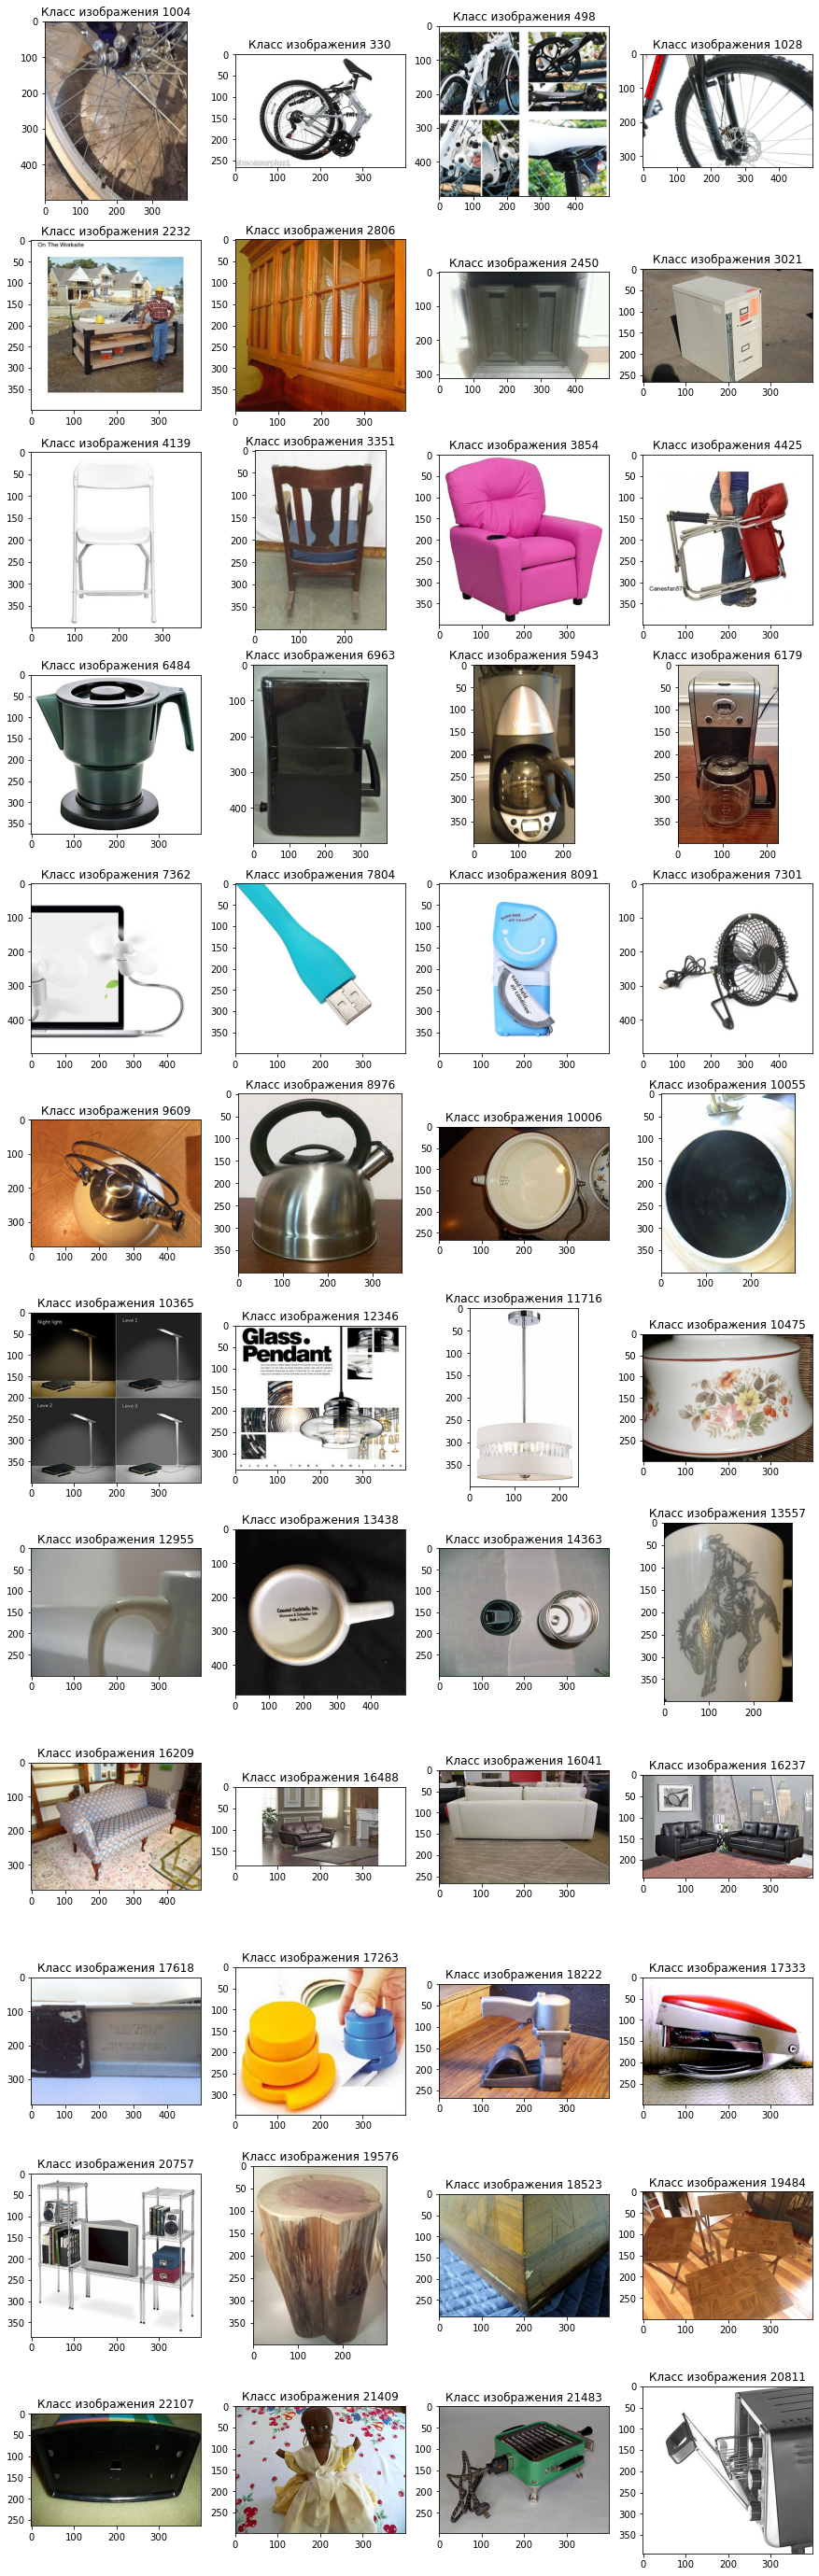

In [5]:
from random import choice

super_classes = df_dataset.super_class_id.unique()

fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(15, 50))
for ax in range(len(super_classes)):
    super_class = super_classes[ax]
    for img in range(4):
        img_class_paths = df_dataset.loc[df_dataset.super_class_id == super_class, 'path'].values
        img_class_path = choice(img_class_paths)
        class_img = df_dataset.loc[df_dataset.path == img_class_path, 'class_id']
        img_class_full_path = f'{DATASET_PATH}{img_class_path}'
        img_class = cv2.cvtColor(cv2.imread(img_class_full_path), cv2.COLOR_BGR2RGB)
        axes[ax, img].set_title(f'Класс изображения {class_img.values[0]}')
        axes[ax, img].imshow(img_class)


In [19]:
from src.DatasetHandler import DatasetHandler

data_handler = DatasetHandler(dataset_dir=DATASET_PATH, split_dataset=(0.9, 0.1), dataset_part=0.1,
                              batch_size=16, target_shape=(256, 256))

Test generating: 100%|██████████| 1181/1181 [00:04<00:00, 272.79it/s]


In [20]:
train = data_handler.get_training_data()
test = data_handler.get_validation_data()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


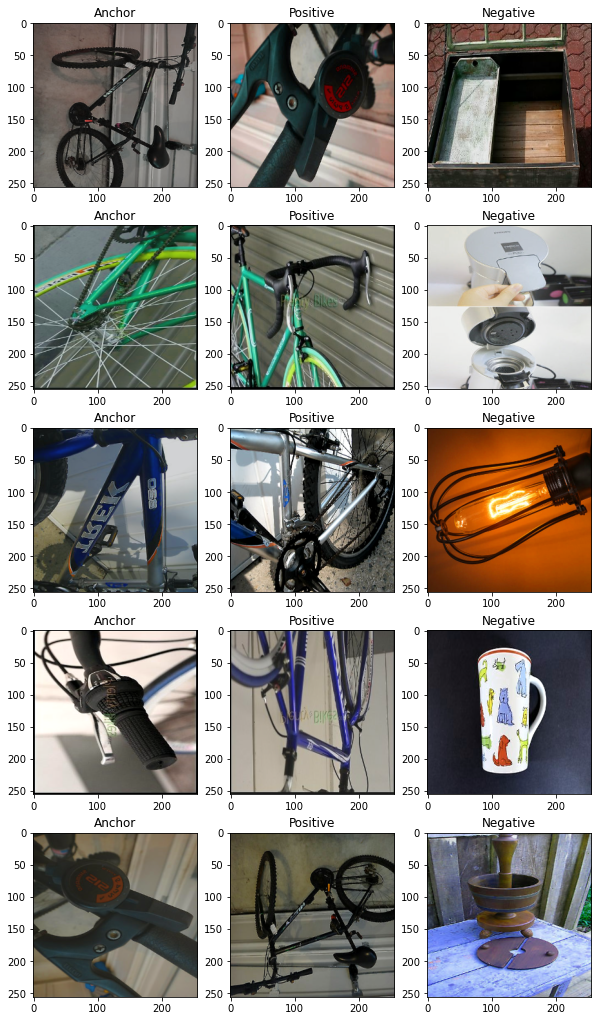

In [21]:
from random import randint

a, p, n = next(iter(train))

fig, axes = plt.subplots(5, 3, figsize=(10, 18))
for i in range(5):
    axes[i, 0].set_title('Anchor')
    axes[i, 0].imshow(a[i].numpy())
    axes[i, 1].set_title('Positive')
    axes[i, 1].imshow(p[i].numpy())
    axes[i, 2].set_title('Negative')
    axes[i, 2].imshow(n[i].numpy())

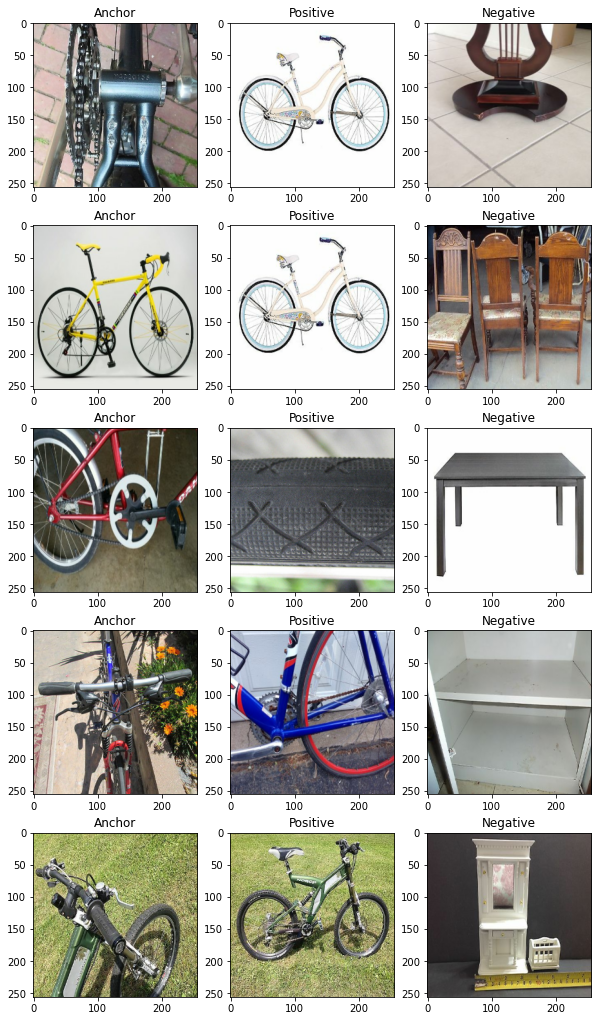

In [9]:
a, p, n = next(iter(test))

fig, axes = plt.subplots(5, 3, figsize=(10, 18))
for i in range(5):
    axes[i, 0].set_title('Anchor')
    axes[i, 0].imshow(a[i].numpy())
    axes[i, 1].set_title('Positive')
    axes[i, 1].imshow(p[i].numpy())
    axes[i, 2].set_title('Negative')
    axes[i, 2].imshow(n[i].numpy())